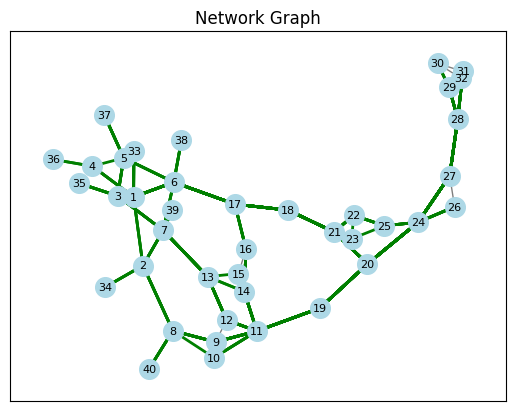

In [51]:
import networkx as nx
import matplotlib.pyplot as plt
import random
from collections import Counter

G = nx.Graph()
nodes = list(range(1, 41))
G.add_nodes_from(nodes)
initial_edges = [
    (1, 2), (1, 3), (1, 4), (1, 6), (2, 7), (2, 8),
    (3, 5), (3, 7), (4, 5), (5, 6), (6, 7), (6, 17),
    (7, 13), (8, 9), (8, 10), (9, 11), (9, 12), (10, 11),
    (11, 12), (11, 14), (11, 19), (12, 13), (13, 14),
    (13, 15), (14, 15), (14, 16), (15, 16), (16, 17),
    (17, 18), (18, 21), (19, 20), (20, 21), (20, 24),
    (21, 22), (21, 23), (22, 23), (22, 25), (23, 25),
    (24, 25), (24, 26), (24, 27), (26, 27), (27, 28),
    (28, 29), (28, 31), (29, 30), (29, 31), (30, 31),
    (30, 32), (31, 32),(33, 1), (34, 2), (35, 3),
     (36, 4), (37, 5), (38, 6), (39, 7), (40, 8),
]

edges = initial_edges
if len(edges) > 108:
    edges = edges[:108]
G.add_edges_from(edges)

def generate_random_pairs(graph, num_pairs):
    nodes = list(graph.nodes())
    pairs = set()

    while len(pairs) < num_pairs:
        src = random.choice(nodes)
        dst = random.choice(nodes)
        if src != dst:
            pair = (src, dst)
            pairs.add(pair)

    return pairs

def find_shortest_paths(graph, pairs):
    paths = {}
    for src, dst in pairs:
        try:
            path = nx.shortest_path(graph, source=src, target=dst)
            paths[(src, dst)] = path
        except nx.NetworkXNoPath:
            print(f"No path exists between {src} and {dst}")
            paths[(src, dst)] = None

    return paths

def get_edges_from_path(path):
    return [(path[i], path[i+1]) for i in range(len(path)-1)]

random_pairs = generate_random_pairs(G,100)
shortest_paths = find_shortest_paths(G, random_pairs)

all_edges = []
for path in shortest_paths.values():
    if path:
        all_edges.extend(get_edges_from_path(path))
edge_frequency = Counter(all_edges)
edge_to_id = {edge: idx for idx, edge in enumerate(set(all_edges))}
path_array = []
path_id = 1
for pair, path in shortest_paths.items():
    if path:
        edge_ids = [edge_to_id[edge] for edge in get_edges_from_path(path)]
        path_info = {"Shortest Path id": "T"+str(path_id), "S-D Pair": pair, "Shortest Path Details": path, "Processor No": edge_ids}
        path_array.append(path_info)
        path_id += 1

# Visualization
pos = nx.spring_layout(G, seed=42)  # Using a seed for reproducibility

# Draw nodes
nx.draw_networkx_nodes(G, pos, node_size=200, node_color='lightblue')

# Draw edges
nx.draw_networkx_edges(G, pos, edgelist=initial_edges, width=1, edge_color='black', alpha=0.5)

all_edges = []
for path in shortest_paths.values():
    if path:
        all_edges.extend(get_edges_from_path(path))

# Draw shortest paths
for path in shortest_paths.values():
    if path:
        edges = get_edges_from_path(path)
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=2, edge_color='green')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=8, font_color='black')

# Show the plot
plt.title("Network Graph")
plt.show()

In [52]:
import pandas as pd
import random
from prettytable import PrettyTable

# Assuming path_array is already defined and contains the necessary data

# Create a PrettyTable object
table = PrettyTable()

# Define the columns
table.field_names = ["Path ID", "Source-Destination Pair", "Path", "Edge IDs"]

# Add rows from path_array
for path_info in path_array:
    table.add_row([path_info["Shortest Path id"], path_info["S-D Pair"], path_info["Shortest Path Details"], path_info["Processor No"]])

# Convert path_array to a DataFrame
df = pd.DataFrame(path_array)
df.columns = ["Path ID", "Source-Destination Pair", "ShortestPath", "ProcessorIds"]
df = df.set_index("Path ID")

# Generating the list L without global mapping
L = []

# Use the original ProcessorIds from df
for index, row in df.iterrows():
    fixj_list = row['ProcessorIds']
    item = {
        'name': index,
        'p': random.randint(1, 5),  # Randomly select a number between 1 and 5
        'fixj': fixj_list,
        'start': -1
    }
    L.append(item)

# Determine the value of m (number of unique processors)
all_processors = set()
for task in L:
    all_processors.update(task['fixj'])
m = len(all_processors)

# Print the results
#print("List L (first 10):", L)
print("Number of unique processors (m):", m)


Number of unique processors (m): 92


Task list creation for genetic algorithm (Interface: Python)

In [53]:
tasks = L
# Step 1: Extract Unique Processor IDs
unique_processor_ids = set()
for task in tasks:
    unique_processor_ids.update(task['fixj'])

# Step 2: Create a Global Mapping
new_id_counter = 1  # Starting value for new IDs
new_id_mapping = {}

for old_id in unique_processor_ids:
    new_id_mapping[old_id] = new_id_counter
    new_id_counter += 1  # Increment the counter for the next unique ID

# Step 3: Update the Task List
updated_tasks = []
for task in tasks:
    new_fixj = [new_id_mapping[old_id] for old_id in task['fixj']]
    updated_task = task.copy()
    updated_task['fixj'] = new_fixj
    updated_tasks.append(updated_task)

# Step 4: Display the Updated Task List
print("Updated Task List with New Mapped IDs:")
print(updated_tasks)

Updated Task List with New Mapped IDs:
[{'name': 'T1', 'p': 3, 'fixj': [15, 22], 'start': -1}, {'name': 'T2', 'p': 2, 'fixj': [4], 'start': -1}, {'name': 'T3', 'p': 1, 'fixj': [65, 62, 38, 82, 48, 34, 1, 78, 40, 73], 'start': -1}, {'name': 'T4', 'p': 3, 'fixj': [1, 78, 40], 'start': -1}, {'name': 'T5', 'p': 5, 'fixj': [42, 65, 62, 38, 82, 48, 34, 1, 78, 88, 50], 'start': -1}, {'name': 'T6', 'p': 4, 'fixj': [16, 49, 18, 76, 61], 'start': -1}, {'name': 'T7', 'p': 2, 'fixj': [11], 'start': -1}, {'name': 'T8', 'p': 5, 'fixj': [19, 49, 33], 'start': -1}, {'name': 'T9', 'p': 4, 'fixj': [78, 81], 'start': -1}, {'name': 'T10', 'p': 3, 'fixj': [35, 62, 38, 43, 31], 'start': -1}, {'name': 'T11', 'p': 5, 'fixj': [32, 11, 22], 'start': -1}, {'name': 'T12', 'p': 3, 'fixj': [23, 27], 'start': -1}, {'name': 'T13', 'p': 2, 'fixj': [37, 79, 64, 60, 16, 57], 'start': -1}, {'name': 'T14', 'p': 4, 'fixj': [3, 80, 87, 41, 18, 76, 61, 74, 59], 'start': -1}, {'name': 'T15', 'p': 5, 'fixj': [79, 64, 60, 16, 4

Task list creation for Longest First and Widest First (Interface: Matlab)

In [54]:
def create_task_struct_string(processing_time, required_processors, start_time):
    return f"struct('processingTime', {processing_time}, 'requiredProcessors', {required_processors}, 'startTime', {start_time}),"

# Example tasks (make sure your tasks are in this format)
original_tasks = updated_tasks

# Convert tasks to the new structure
converted_task_strings = []
for task in original_tasks:
    task_string = create_task_struct_string(
        processing_time=task['p'],
        required_processors=task['fixj'],
        start_time=task['start']
    )
    converted_task_strings.append(task_string)

# Display the converted task strings
print("Converted Task Strings:")
for task_str in converted_task_strings:
    print(task_str)

Converted Task Strings:
struct('processingTime', 3, 'requiredProcessors', [15, 22], 'startTime', -1),
struct('processingTime', 2, 'requiredProcessors', [4], 'startTime', -1),
struct('processingTime', 1, 'requiredProcessors', [65, 62, 38, 82, 48, 34, 1, 78, 40, 73], 'startTime', -1),
struct('processingTime', 3, 'requiredProcessors', [1, 78, 40], 'startTime', -1),
struct('processingTime', 5, 'requiredProcessors', [42, 65, 62, 38, 82, 48, 34, 1, 78, 88, 50], 'startTime', -1),
struct('processingTime', 4, 'requiredProcessors', [16, 49, 18, 76, 61], 'startTime', -1),
struct('processingTime', 2, 'requiredProcessors', [11], 'startTime', -1),
struct('processingTime', 5, 'requiredProcessors', [19, 49, 33], 'startTime', -1),
struct('processingTime', 4, 'requiredProcessors', [78, 81], 'startTime', -1),
struct('processingTime', 3, 'requiredProcessors', [35, 62, 38, 43, 31], 'startTime', -1),
struct('processingTime', 5, 'requiredProcessors', [32, 11, 22], 'startTime', -1),
struct('processingTime', 3